<a href="https://colab.research.google.com/github/MHoseinHoushmand/ALU-Mechanism/blob/main/Clustering_by_SLFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pdb
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from numpy.linalg import norm
import operator
import random

In [2]:
def docs_as_tfidf(docs):
  vectorizer = TfidfVectorizer(
     max_df=0.5, #Removing terms that are used in more than 50% of articles
     min_df=5,   #Removing terms that are not used in less than 10 of articles
     stop_words="english",
     #  max_features=1000,
  )
  docs_vector = vectorizer.fit_transform(docs)
  print(len(docs_vector.toarray()[0]))
  return docs_vector.toarray()

In [3]:
categories = [  #Select 4 categories from fetch_20newsgroups dataset
   # "alt.atheism",
    "comp.graphics",
   # "sci.space",
    "rec.sport.hockey",
]
dataset = fetch_20newsgroups( #Preprocessing before using dataset
    remove=("headers", "footers", "quotes"),
    subset="all",
    categories=categories,
    shuffle=True,
    random_state=42,
)

labels = dataset.target[0:500]
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0]
print(f"{len(dataset.data)} documents - {true_k} categories")
print(labels)

1972 documents - 2 categories
[1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0
 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0
 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1
 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1
 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0
 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0
 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1
 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0
 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0
 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1
 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0

In [4]:
def cosin_sim(a,b):
   return cosine_similarity([a], [b])[0][0]

**Object oriented Format**

In [5]:
class Cluster:
     def __init__(self):
         self.documents = []
         self.doc_mean = []

     def get_doc_mean(self):
        self.doc_mean = np.average(self.documents, axis=0)
        return self.doc_mean

     def SSE(self):     #Sum of squared error(SSE) as similarity of each documents with the cluster mean in document
         doc_mean = self.get_doc_mean()
         size = len(self.documents)
         sse=0
         for doc in self.documents:
             sse += cosin_sim(doc,doc_mean)**2
         sse = sse/size
         return sse


In [13]:
class Frog:
     def __init__(self,answer,docs_vector,n_clusters):
        self.answer = answer
        self.value = self.fitness(docs_vector,n_clusters)



     def build_clusters(self,docs_vector,n_clusters):#Build clusters for frog
          clusters = []
          for i in range(n_clusters):
             cluster = Cluster()
             clusters.append(cluster)
          for j in range(len(self.answer)):
             if -1 < self.answer[j]:
                clusters[self.answer[j]].documents.append(docs_vector[j])
          return clusters


     def WC(self,clusters):   #Calculate similarity within clusters
        WC = 0
        for cluster in clusters:
            WC += cluster.SSE()
        return WC


     def BC(self,doc_means):#Calculate similarity between clusters
          BC=0
          size = len(doc_means)
          for i in range(size):
              for j in range(i+1,size):
                  BC += cosin_sim(doc_means[i],doc_means[j])**2
          return BC


     def fitness(self,docs_vector,n_clusters):
           doc_means = []
          # pdb.set_trace()
           clusters = self.build_clusters(docs_vector,n_clusters)
           for i in range(n_clusters):
               doc_means.append(
                  clusters[i].get_doc_mean()
               )
           wc = self.WC(clusters) #Calculate similarity within clusters
           bc = self.BC(doc_means) #Calculate similarity between clusters
           fitness = wc/bc
           return fitness


     def cross_over(self,frog_b,docs_vector,n_clusters): #perform 2 points cross over
           frog_size = len(self.answer)
           points = sorted(np.random.choice(np.arange(0,frog_size), size=2, replace=False))
           answer1 = self.answer[:points[0]] + frog_b.answer[points[0]:points[1]] + self.answer[points[1]:]
           answer2 = frog_b.answer[:points[0]] + self.answer[points[0]:points[1]] + frog_b.answer[points[1]:]
           child1 = Frog(answer1,docs_vector,n_clusters)
           child2 = Frog(answer2,docs_vector,n_clusters)
           if child1.value > child2.value: # return best child
               return child1
           else :
               return child2

     def mutation(self,docs_vector,n_clusters):#Select len(answer)/4 of answers and change value
         new_ans = list(self.answer)
         size = int(len(self.answer)/4)
         indexes = np.random.choice(np.arange(0,len(self.answer)), size=size, replace=False)
         values= [random.randint(0, n_clusters-1) for _ in range(size)]
         for i in range(size):
            new_ans[indexes[i]] = values[i]
         child = Frog(tuple(new_ans),docs_vector,n_clusters)
         return  child

In [7]:
class Memplex:
     def __init__(self):
         self.frogs = []

     def best(self):
        if len(self.frogs) > 0:
           return self.frogs[0]

     def worst(self,frogs):
        if len(self.frogs) > 0:
           return self.frogs[len(self.frogs)-1]

     def frogs_to_remove(self,sub_memplex):
         for item in sub_memplex.frogs:
            self.frogs.remove(item)
         return self

     def add_frogs(self,submemplex):
         self.frogs = self.frogs + submemplex.frogs

In [8]:
class Submemplex:
     def __init__(self, memplex ,n_submemplex,memplex_size ):
         self.frogs = []
         self.prob_list = []
         indexs = []
         for i in range(memplex_size):
             for j in range(2*(memplex_size-i)):
                 self.prob_list.append(i)
         k=0
         while(k!=n_submemplex):
            index = random.choice(self.prob_list)
            key = memplex.frogs[index].answer
           # pdb.set_trace()
            if index not in indexs:
                self.frogs.append(memplex.frogs[index])
                indexs.append(index)
                k+=1

     def best(self):
         local_best =  max(self.frogs, key=lambda frog: frog.value)
         return local_best

     def worst(self):
         local_worst =  min(self.frogs, key=lambda frog: frog.value)
         return local_worst


In [19]:
class Population:
     def __init__(self,n_clusters, n_population ,n_docs, docs_vector):
        answers = np.random.randint(0, n_clusters, size=(n_population , n_docs))
        self.frogs = []
        i=0
        for answer in answers:
           frog = Frog(tuple(answer),docs_vector,n_clusters)
           self.frogs.append(frog)
           print(i,frog.value)
           i+=1

     def clear_frogs(self):
        self.frogs.clear()

     # Best frog in population
     def global_best(self,memplexes):
        local_bests = []
        for memplex in memplexes:
            local_best =  max(memplex.frogs, key=lambda frog: frog.value)
            local_bests.append(local_best)
        global_best =  max(local_bests, key=lambda frog: frog.value)
        return global_best

     #Shufle memplexes and recreate population
     def shufeling(self,memplexes):
         output = []
         for memplex in memplexes:
            output = output+ memplex.frogs
         self.frogs = output

In [10]:
class SFLA:
     def  __init__(self,n_clusters, max_iteration, docs):
        self.n_clusters = n_clusters
        self.max_iteration =  max_iteration
        self.docs = docs
        self.n_population = 400 # Frogs number
        self.memplex_size = 20 #define as m
        self.n_memplex = 20 #define as n
        self.local_iteration = 10 #Iteration As local search
        self.n_submemplex = 5
        self.docs_vector = docs_as_tfidf(docs)  #Convert documents as tfidf values
        self.n_docs = len(docs)


     def create_memplexes(self,population,n_memplex):#ّFrogs are distributed fairly in the memplexes
             population = sorted(population.frogs, key=lambda frog: frog.value)
             memplexes = []
             for i in range(n_memplex):
                 memplex = Memplex()
                 memplexes.append(memplex)
             for i in range(self.n_population):
                 memplexes[i % n_memplex].frogs.append(population[i])
             return memplexes



     def search(self):
        population = Population(self.n_clusters, self.n_population, self.n_docs, self.docs_vector)
        for i in range(self.max_iteration):
           memplexes = self.create_memplexes(population,self.n_memplex)
           population.clear_frogs()
           for j in range(self.n_memplex):
               submemplex = Submemplex(memplexes[j],self.n_submemplex,self.memplex_size)
               memplexes[j].frogs_to_remove(submemplex)
               print(i,j,len(memplexes[j].frogs))
               for k in range(self.local_iteration):
                    lfrog_best = submemplex.best()
                    lfrog_worst = submemplex.worst()
                    frog_out = lfrog_worst.cross_over(lfrog_best, self.docs_vector, self.n_clusters)
                    if (lfrog_worst.value < frog_out.value ):
                         submemplex.frogs.remove(lfrog_worst)
                         submemplex.frogs.append(frog_out)
                    else:
                         gfrog_best = population.global_best(memplexes)
                         frog_out = gfrog_best.cross_over(lfrog_worst, self.docs_vector, self.n_clusters)
                         if (lfrog_worst.value<frog_out.value):
                                      submemplex.frogs.remove(lfrog_worst)
                                      submemplex.frogs.append(frog_out)
                         else:
                                      frog_out = gfrog_best.mutation(self.docs_vector,self.n_clusters)
                                      submemplex.frogs.remove(lfrog_worst)
                                      submemplex.frogs.append(frog_out)
               memplexes[j].add_frogs(submemplex)
           gfrog_best = population.global_best(memplexes)
           print(gfrog_best.answer)
           print(gfrog_best.value)
           population.shufeling(memplexes)

In [11]:
docs = dataset.data[0:200]

In [14]:
sfla = SFLA(2,50,docs)
sfla.search()

380
0 0.16312023358868805
1 0.18775277579810062
2 0.17044586107113907
3 0.16446381962714066
4 0.18422334074887528
5 0.17894467553091795
6 0.16702169173104445
7 0.15015295942785864
8 0.17107454304040826
9 0.1594590261828318
10 0.1631355155318153
11 0.15110574138034885
12 0.1574102907475303
13 0.16407799067505968
14 0.14890469632666808
15 0.16871313750661585
16 0.16851989036841147
17 0.16589854346598995
18 0.1632864678324155
19 0.1620518202241502
20 0.16497444188798963
21 0.16162428046059424
22 0.17921881381491087
23 0.17061307519727
24 0.17421753319778072
25 0.15370449481181903
26 0.1689055027524176
27 0.16999579733320888
28 0.16351637067528552
29 0.174810201131854
30 0.1504718860854038
31 0.1691777651015574
32 0.15470596256630587
33 0.19231393037117483
34 0.1682792633804365
35 0.15837408103128767
36 0.1573843865464676
37 0.15345535471232968
38 0.16596457676329598
39 0.1671950309625132
40 0.15913957041160656
41 0.15714121510539875
42 0.15887760627085332
43 0.15445500868028866
44 0.16310

380
1972 documents - 2 categories


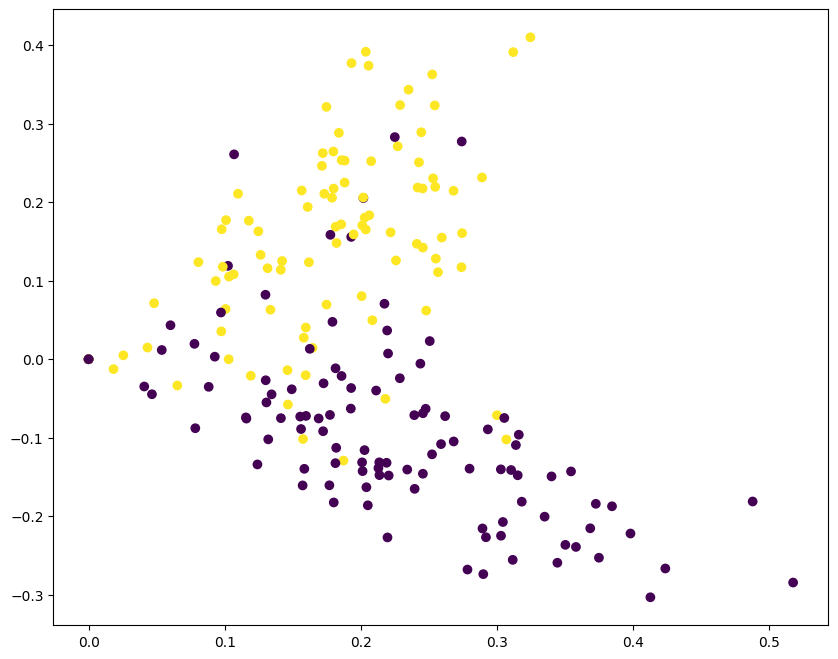

In [18]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt


lsa = TruncatedSVD(n_components=2)
docs_vector = docs_as_tfidf(docs)
lsa_matrix = lsa.fit_transform(docs_vector)

labels = (0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0)
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0]
print(f"{len(dataset.data)} documents - {true_k} categories")


lsa = TruncatedSVD(n_components=2)
lsa_matrix = lsa.fit_transform(docs_vector)

plt.figure(figsize=(10, 8))
plt.scatter(lsa_matrix[:, 0], lsa_matrix[:, 1], c=list(labels), cmap='viridis')

In [ ]:
population_size = 400 # Frogs number
memplex_num = 20 #define as m
memplex_size = 20 #define as n
max_iteration = 100 #Total Iteration
local_iteration = 10 #Iteration As local search
n_clusters = 4
docs = dataset.data[0:500]
docs_vector = docs_as_tfidf(docs)
print(list(docs_vector[0]))

In [ ]:
#Calculate sum of squared error(SSE) as similarity of each documents with the cluster mean in document
def SSE(cluster,doc_mean):
  size = len(cluster)
  sse=0
  for doc in cluster:
    sse += cosin_sim(doc,doc_mean)**2
  sse = sse/size
  return sse

In [ ]:
#Calculate similarity between clusters
def BC(doc_means):
   BC=0
   size = len(doc_means)
   for i in range(size):
      for j in range(i+1,size):
          BC += cosin_sim(doc_means[i],doc_means[j])**2
   return BC


In [ ]:
#Calculate similarity within clusters
def WC(clusters):
    WC = 0
    for cluster in clusters:
        doc_mean = np.average(cluster, axis=0)
        WC += SSE(cluster,doc_mean)
    return WC

In [ ]:
def build_clusters(answer,docs_vector,n_clusters):
   clusters = []
   for i in range(n_clusters):
       clusters.append([])
   for j in range(len(answer)):
       if -1 < answer[j]:
        clusters[answer[j]].append(docs_vector[j])
   return clusters

In [ ]:
def fitness(answer,docs_vector,size):
   doc_means = []
   clusters = build_clusters(answer,docs_vector,size)
   for i in range(size):
       doc_means.append(
          np.average(clusters[i], axis=0)
       )
   wc = WC(clusters) #Calculate similarity within clusters
   print(wc)
   bc = BC(doc_means) #Calculate similarity between clusters
   print(bc)
   fitness = wc/bc
   return fitness

In [ ]:
#perform 2 points cross over
def cross_over(answer_a,answer_b):
    frog_size = len(answer_a)
    points = sorted(np.random.choice(np.arange(0,frog_size), size=2, replace=False))
    child1 = answer_a[:points[0]] + answer_b[points[0]:points[1]] + answer_a[points[1]:]
    child2 = answer_b[:points[0]] + answer_a[points[0]:points[1]] + answer_b[points[1]:]
    fitness1 =  fitness(child1 ,docs_vector,n_clusters)
    fitness2 = fitness(child2 ,docs_vector,n_clusters)
    if fitness1 > fitness2: # return best child
       return (child1 , fitness1)
    else :
       return (child2 , fitness2)


In [ ]:
def best_and_worst(answers):
     best =  max(answers, key=lambda x:x[1])
     worst = min(answers, key=lambda x:x[1])
     return best , worst

In [ ]:
# Best frog in population
def global_best(memplexes):
     local_bests = []
     for memplex in memplexes:
         local_best =   max(memplex, key=lambda x:x[1])
         local_bests.append(local_best)
     global_best = max(local_bests, key=lambda x:x[1])
     return global_best

In [ ]:
def frogs_to_remove(sub_memplex , memplex):
    for item in sub_memplex:
       memplex.remove(item)
    return memplex

In [ ]:
def mutation(global_best,clusters_size):
    new_ans = list(global_best)
    size = int(len(global_best)/4)
    indexes = np.random.choice(np.arange(0,len(global_best)), size=size, replace=False)
    values= [random.randint(0, 3) for _ in range(size)]
    for i in range(size):
      new_ans[indexes[i]] = values[i]
    return tuple(new_ans)

In [ ]:

def Create_memplexes(population,memplex_num):
     population = list(reversed(sorted(population, key=lambda x: x[1])))
     memplexes = []
     population_size = len(population)
     for i in range(memplex_num):
         memplexes.append([])
     for i in range(population_size):
         memplexes[i % memplex_num].append(population[i])
     return memplexes


In [ ]:
def create_submemplex(memplex,memplex_size, submemplex_size):
    sub_memplex = []
    prob_list = []
    keys = []
    for i in range(memplex_size):
       for j in range(2*(memplex_size-i)):
          prob_list.append(i)
    k=0
    while(k!=submemplex_size):
       index = random.choice(prob_list)
       key = memplex[index][0]
       if key not in keys:
           sub_memplex.append(memplex[index])
           keys.append(key)
           k+=1
    return sub_memplex


In [ ]:
#sh
def shufeling(memplexes):
    output = []
    for memplex in memplexes:
        output = output+ memplex
    return output